# Session 6

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt

## Election Results 2023

In today's session we are going to explore the election results declared on Dec 03, 2023.

[The Election Commission Website](https://results.eci.gov.in/AcResultGenDecNew2023/) has published all the results. I have [downloaded the data][1] from that website and combined into a single csv file. 

[1]: https://github.com/anandology/election-results-2023

### What would you like to see from this data?

- Anand: The winning candidate in each constituency
- Abhishek: The total number of votes for each party
- Akshay: Percentage of votes for postal ballets and evm machines?
- Anish: Number of candidates contesting per each constituency?
  Aravindh: Is there is bias towards any party comparng postal and evm.
- Karan: visualize votes for each party in each state
- Manik: Find the margins and which are the constituencies where the margin is too small?
- Vipul: Candidated list of top 1% candidate with the largest number of vote percentage and the party that the candidate belongs to.
- Zoya: Party wise trends
- Anand: What are the names of the people who are contesting? What are the names of the people winning and runner up?

### The Constituencies

In [16]:
url = "https://raw.githubusercontent.com/anandology/election-results-2023/main/data/constituencies.csv"
df_constituencies = pd.read_csv(url)

In [17]:
df_constituencies.head()

,ac_no,st_code,st_name,ac_name
0,1,S12,Madhya Pradesh,Sheopur
1,2,S12,Madhya Pradesh,Vijaypur
2,3,S12,Madhya Pradesh,Sabalagadh
3,4,S12,Madhya Pradesh,Jaura
4,5,S12,Madhya Pradesh,Sumaoli


In [18]:
df_constituencies.st_name.value_counts()

st_name
Madhya Pradesh    230
Rajasthan         200
Telangana         119
Chhattisgarh       90
Name: count, dtype: int64

<Axes: xlabel='st_name'>

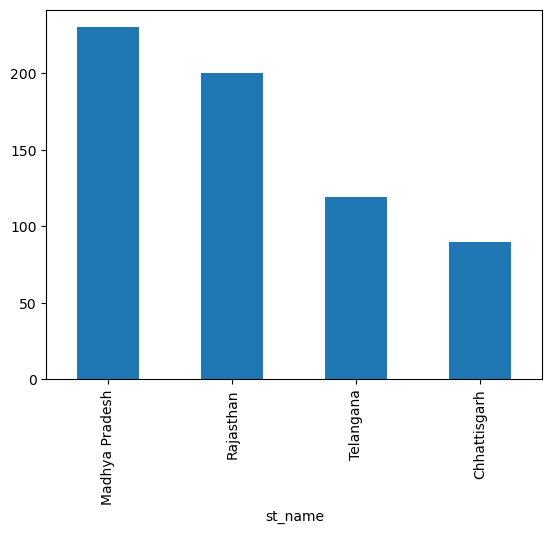

In [24]:
(df_constituencies
 .st_name
 .value_counts()
 .plot.bar()
)

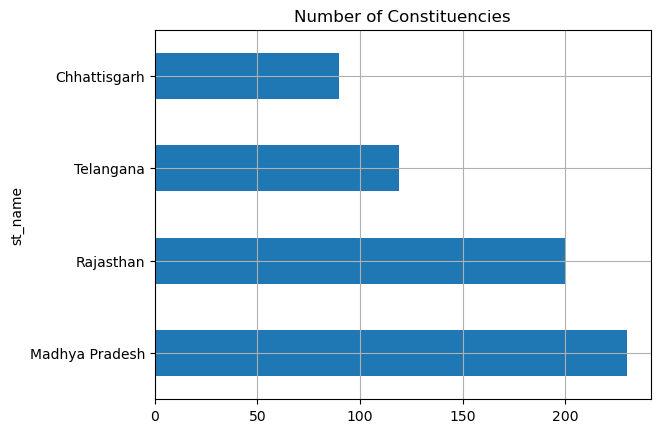

In [19]:
(df_constituencies
 .st_name
 .value_counts()
 .plot.barh())

plt.grid()
plt.title("Number of Constituencies");

### The Results

In [25]:
url = "https://github.com/anandology/election-results-2023/raw/main/data/results.csv"

In [26]:
df = pd.read_csv(url)

In [27]:
df.shape

(8506, 10)

In [28]:
df.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes
0,S12,Madhya Pradesh,1,Sheopur,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70
2,S12,Madhya Pradesh,1,Sheopur,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88
3,S12,Madhya Pradesh,1,Sheopur,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35
4,S12,Madhya Pradesh,1,Sheopur,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11


In [14]:
url = "https://results.eci.gov.in/AcResultGenDecNew2023/ConstituencywiseS1253.htm"
dfs = pd.read_html(url)
len(dfs)

1

In [15]:
dfs[0]

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,1.0,CHANDA,Aam Aadmi Party,1749,2,1751,1.02
1,2.0,KUNWAR PRADYUMNA SINGH LODHI,Bharatiya Janata Party,67401,120,67521,39.46
2,3.0,BAHIN RAMSIYA BHARTI,Indian National Congress,88613,440,89053,52.04
3,4.0,LAKHAN RAMTORIYA,Bahujan Samaj Party,1856,4,1860,1.09
4,5.0,ANUJ DINESH YADAV,Vindhya Janta Party,322,0,322,0.19
5,6.0,DEVENDRA LODHI,Bhartiya Shakti Chetna Party,393,1,394,0.23
6,7.0,ARJUN SINGH CHANDEL,Independent,262,0,262,0.15
7,8.0,ASHUTOSH PATHAK,Independent,294,1,295,0.17
8,9.0,KARAN SINGH LODHI SUNWAHA,Independent,4210,10,4220,2.47
9,10.0,DHARMENDRA KUMAR SAHU,Independent,399,2,401,0.23


### Do we have all the data is any data missing?

We may be able to tally that with the list of constituencies.

In [29]:
df_constituencies.shape

(639, 4)

In [32]:
df_constituencies.head()

,ac_no,st_code,st_name,ac_name
0,1,S12,Madhya Pradesh,Sheopur
1,2,S12,Madhya Pradesh,Vijaypur
2,3,S12,Madhya Pradesh,Sabalagadh
3,4,S12,Madhya Pradesh,Jaura
4,5,S12,Madhya Pradesh,Sumaoli


In [33]:
df_constituencies.st_name.value_counts()

st_name
Madhya Pradesh    230
Rajasthan         200
Telangana         119
Chhattisgarh       90
Name: count, dtype: int64

In [30]:
df.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes
0,S12,Madhya Pradesh,1,Sheopur,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70
2,S12,Madhya Pradesh,1,Sheopur,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88
3,S12,Madhya Pradesh,1,Sheopur,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35
4,S12,Madhya Pradesh,1,Sheopur,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11


In [39]:
df1 = (df
 .groupby(['st_code', 'st_name', 'ac_no', 'ac_name'])
 .count()
 .index
 .to_frame()
.reset_index(drop=True))

df1

,st_code,st_name,ac_no,ac_name
0,S12,Madhya Pradesh,1,Sheopur
1,S12,Madhya Pradesh,2,Vijaypur
2,S12,Madhya Pradesh,3,Sabalagadh
3,S12,Madhya Pradesh,4,Jaura
4,S12,Madhya Pradesh,5,Sumaoli
...,...,...,...,...
633,S29,Telangana,115,Wyra (ST)
634,S29,Telangana,116,Sathupalle (SC)
635,S29,Telangana,117,Kothagudem
636,S29,Telangana,118,Aswaraopeta (ST)


How to find the missing ones?

In [43]:
df2 = pd.concat([df_constituencies, df1])

In [44]:
df2.head()

,ac_no,st_code,st_name,ac_name
0,1,S12,Madhya Pradesh,Sheopur
1,2,S12,Madhya Pradesh,Vijaypur
2,3,S12,Madhya Pradesh,Sabalagadh
3,4,S12,Madhya Pradesh,Jaura
4,5,S12,Madhya Pradesh,Sumaoli


In [47]:
st_code = "S12"
ac_no = 1
df2.query("st_code == @st_code and ac_no == @ac_no").drop_duplicates(keep=False)

,ac_no,st_code,st_name,ac_name


In [49]:
# missing data
df2.drop_duplicates(keep=False)

,ac_no,st_code,st_name,ac_name
232,3,S20,Rajasthan,Karanpur


### Find winning candidate and winning party for each consistuency and the margin

In [50]:
df.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes
0,S12,Madhya Pradesh,1,Sheopur,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70
2,S12,Madhya Pradesh,1,Sheopur,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88
3,S12,Madhya Pradesh,1,Sheopur,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35
4,S12,Madhya Pradesh,1,Sheopur,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11


In [59]:
st_code = "S29"
ac_no = 27
df.query("st_code == @st_code and ac_no==@ac_no")

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes
6547,S29,Telangana,27,Choppadandi (SC),KONKATI SHEKHAR,Bahujan Samaj Party,5097,56,5153,2.83
6548,S29,Telangana,27,Choppadandi (SC),BODIGA SHOBHA GALANNA,Bharatiya Janata Party,26507,162,26669,14.64
6549,S29,Telangana,27,Choppadandi (SC),MEDIPALLY SATHYAM,Indian National Congress,89757,638,90395,49.62
6550,S29,Telangana,27,Choppadandi (SC),RAVI SHANKAR SUNKE,Bharat Rashtra Samithi,52847,109,52956,29.07
6551,S29,Telangana,27,Choppadandi (SC),JANGAM SADHANA,Dharma Samaj Party,738,7,745,0.41
6552,S29,Telangana,27,Choppadandi (SC),DUMPALA NARSHIM BABU,Jai Swaraj Party,344,1,345,0.19
6553,S29,Telangana,27,Choppadandi (SC),BANGARI MADHAVA,Pyramid Party of India,237,0,237,0.13
6554,S29,Telangana,27,Choppadandi (SC),BEJJANKI PRASHANTH KUMAR,Peoples Party of India (Democratic),375,0,375,0.21
6555,S29,Telangana,27,Choppadandi (SC),LAKKAM AJAY,Vidhyarthula Rajakiya Party,248,0,248,0.14
6556,S29,Telangana,27,Choppadandi (SC),VIJAY KUMAR MUTHYALA,All India Forward Bloc,357,1,358,0.20


Pandas has utilities to rank a column or a group.

In [61]:
(df
 .set_index(["candidate", "party"])
 .query("st_code == @st_code and ac_no==@ac_no")
 .total_votes.rank(ascending=False)
)

candidate                 party                              
KONKATI SHEKHAR           Bahujan Samaj Party                     4.0
BODIGA SHOBHA GALANNA     Bharatiya Janata Party                  3.0
MEDIPALLY SATHYAM         Indian National Congress                1.0
RAVI SHANKAR SUNKE        Bharat Rashtra Samithi                  2.0
JANGAM SADHANA            Dharma Samaj Party                      8.0
DUMPALA NARSHIM BABU      Jai Swaraj Party                       13.0
BANGARI MADHAVA           Pyramid Party of India                 15.0
BEJJANKI PRASHANTH KUMAR  Peoples Party of India (Democratic)    11.0
LAKKAM AJAY               Vidhyarthula Rajakiya Party            14.0
VIJAY KUMAR MUTHYALA      All India Forward Bloc                 12.0
AKKENAPALLI SATHISH       Independent                            10.0
KALLEPELLY VIJAYA RAJU    Independent                             7.0
GOWRU AJAY KUMAR          Independent                             5.0
DASARI VIDYASAGAR         In

We can also apply rank on group by.

In [62]:
df.groupby(["st_code", "st_name", "ac_no", "ac_name"]).total_votes.rank(ascending=False).head()

0     2.0
1     1.0
2     3.0
3     5.0
4    12.0
Name: total_votes, dtype: float64

In [67]:
df['vote_rank'] = (
    df
    .groupby(["st_code", "st_name", "ac_no", "ac_name"])
    .total_votes
    .rank(ascending=False)
    .astype('int'))

In [68]:
df.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
0,S12,Madhya Pradesh,1,Sheopur,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45,2
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1
2,S12,Madhya Pradesh,1,Sheopur,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88,3
3,S12,Madhya Pradesh,1,Sheopur,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35,5
4,S12,Madhya Pradesh,1,Sheopur,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11,12


In [69]:
st_code = "S29"
ac_no = 27
df.query("st_code == @st_code and ac_no==@ac_no")

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
6547,S29,Telangana,27,Choppadandi (SC),KONKATI SHEKHAR,Bahujan Samaj Party,5097,56,5153,2.83,4
6548,S29,Telangana,27,Choppadandi (SC),BODIGA SHOBHA GALANNA,Bharatiya Janata Party,26507,162,26669,14.64,3
6549,S29,Telangana,27,Choppadandi (SC),MEDIPALLY SATHYAM,Indian National Congress,89757,638,90395,49.62,1
6550,S29,Telangana,27,Choppadandi (SC),RAVI SHANKAR SUNKE,Bharat Rashtra Samithi,52847,109,52956,29.07,2
6551,S29,Telangana,27,Choppadandi (SC),JANGAM SADHANA,Dharma Samaj Party,738,7,745,0.41,8
6552,S29,Telangana,27,Choppadandi (SC),DUMPALA NARSHIM BABU,Jai Swaraj Party,344,1,345,0.19,13
6553,S29,Telangana,27,Choppadandi (SC),BANGARI MADHAVA,Pyramid Party of India,237,0,237,0.13,15
6554,S29,Telangana,27,Choppadandi (SC),BEJJANKI PRASHANTH KUMAR,Peoples Party of India (Democratic),375,0,375,0.21,11
6555,S29,Telangana,27,Choppadandi (SC),LAKKAM AJAY,Vidhyarthula Rajakiya Party,248,0,248,0.14,14
6556,S29,Telangana,27,Choppadandi (SC),VIJAY KUMAR MUTHYALA,All India Forward Bloc,357,1,358,0.20,12


In [75]:
df_winners = df[df.vote_rank==1]

In [76]:
df_winners.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1
17,S12,Madhya Pradesh,2,Vijaypur,RAMNIWAS RAWAT,Indian National Congress,68818,828,69646,33.63,1
30,S12,Madhya Pradesh,3,Sabalagadh,Smt. Sarla vijendra Rawat,Bharatiya Janata Party,66305,482,66787,37.07,1
40,S12,Madhya Pradesh,4,Jaura,PANKAJ UPADHYAY,Indian National Congress,88109,1144,89253,46.71,1
57,S12,Madhya Pradesh,5,Sumaoli,AIDAL SINGH KANSANA,Bharatiya Janata Party,72134,374,72508,38.95,1


In [77]:
df_winners.shape

(638, 11)

In [78]:
df1 = df[df.vote_rank.isin([1, 2])]

In [87]:
"st_code st_name ac_no ac_name".split()

['st_code', 'st_name', 'ac_no', 'ac_name']

In [86]:
drop_columns = "evm_votes postal_votes percent_votes".split()

df1 = (
    df
    .drop(columns=drop_columns)
    .query("vote_rank in [1, 2]")
    # .set_index("st_code st_name ac_no ac_name".split())
    .pivot(columns="vote_rank", 
           index="st_code st_name ac_no ac_name".split(), 
           values="candidate party total_votes".split())
)

df1.head()

candidate  \
vote_rank                                                        1   
st_code st_name        ac_no ac_name                                 
S12     Madhya Pradesh 1     Sheopur                   BABU JANDEL   
                       2     Vijaypur               RAMNIWAS RAWAT   
                       3     Sabalagadh  Smt. Sarla vijendra Rawat   
                       4     Jaura                 PANKAJ UPADHYAY   
                       5     Sumaoli           AIDAL SINGH KANSANA   

                                                                          \
vote_rank                                                              2   
st_code st_name        ac_no ac_name                                       
S12     Madhya Pradesh 1     Sheopur        DURGALAL VIJAY (VAKEEL SAAB)   
                       2     Vijaypur                    BABOO LAL MEWRA   
                       3     Sabalagadh                BAIJ NATH KUSHWAH   
                       4     Jaura       SUBEDAR SINGH SIKARWAR RAJOUDHA   
                       5     Sumaoli              KULDEEP SINGH SIKARWAR   

                                                            party  \
vote_rank                                                       1   
st_code st_name        ac_no ac_name                                
S12     Madhya Pradesh 1     Sheopur     Indian National Congress   
                       2     Vijaypur    Indian National Congress   
                       3     Sabalagadh    Bharatiya Janata Party   
                       4     Jaura       Indian National Congress   
                       5     Sumaoli       Bharatiya Janata Party   

                                                                  total_votes  \
vote_rank                                                       2           1   
st_code st_name        ac_no ac_name                                            
S12     Madhya Pradesh 1     Sheopur       Bharatiya Janata Party       96844   
                       2     Vijaypur      Bharatiya Janata Party       69646   
                       3     Sabalagadh  Indian National Congress       66787   
                       4     Jaura         Bharatiya Janata Party       89253   
                       5     Sumaoli          Bahujan Samaj Party       72508   

                                                
vote_rank                                    2  
st_code st_name        ac_no ac_name            
S12     Madhya Pradesh 1     Sheopur     85714  
                       2     Vijaypur    51587  
                       3     Sabalagadh  56982  
                       4     Jaura       58972  
                       5     Sumaoli     56500

In [88]:
df1.columns

MultiIndex([(  'candidate', 1),
            (  'candidate', 2),
            (      'party', 1),
            (      'party', 2),
            ('total_votes', 1),
            ('total_votes', 2)],
           names=[None, 'vote_rank'])

In [89]:
df1.columns = "win_candidate run_candidate win_party run_pary win_votes run_votes".split()

In [90]:
df1.head()

win_candidate  \
st_code st_name        ac_no ac_name                                 
S12     Madhya Pradesh 1     Sheopur                   BABU JANDEL   
                       2     Vijaypur               RAMNIWAS RAWAT   
                       3     Sabalagadh  Smt. Sarla vijendra Rawat   
                       4     Jaura                 PANKAJ UPADHYAY   
                       5     Sumaoli           AIDAL SINGH KANSANA   

                                                           run_candidate  \
st_code st_name        ac_no ac_name                                       
S12     Madhya Pradesh 1     Sheopur        DURGALAL VIJAY (VAKEEL SAAB)   
                       2     Vijaypur                    BABOO LAL MEWRA   
                       3     Sabalagadh                BAIJ NATH KUSHWAH   
                       4     Jaura       SUBEDAR SINGH SIKARWAR RAJOUDHA   
                       5     Sumaoli              KULDEEP SINGH SIKARWAR   

                                                        win_party  \
st_code st_name        ac_no ac_name                                
S12     Madhya Pradesh 1     Sheopur     Indian National Congress   
                       2     Vijaypur    Indian National Congress   
                       3     Sabalagadh    Bharatiya Janata Party   
                       4     Jaura       Indian National Congress   
                       5     Sumaoli       Bharatiya Janata Party   

                                                         run_pary win_votes  \
st_code st_name        ac_no ac_name                                          
S12     Madhya Pradesh 1     Sheopur       Bharatiya Janata Party     96844   
                       2     Vijaypur      Bharatiya Janata Party     69646   
                       3     Sabalagadh  Indian National Congress     66787   
                       4     Jaura         Bharatiya Janata Party     89253   
                       5     Sumaoli          Bahujan Samaj Party     72508   

                                        run_votes  
st_code st_name        ac_no ac_name               
S12     Madhya Pradesh 1     Sheopur        85714  
                       2     Vijaypur       51587  
                       3     Sabalagadh     56982  
                       4     Jaura          58972  
                       5     Sumaoli        56500

Let's rearrange the columns.

In [91]:
columns = "win_candidate win_party win_votes run_candidate run_pary run_votes".split()
df1 = df1[columns]
df1.head()

win_candidate  \
st_code st_name        ac_no ac_name                                 
S12     Madhya Pradesh 1     Sheopur                   BABU JANDEL   
                       2     Vijaypur               RAMNIWAS RAWAT   
                       3     Sabalagadh  Smt. Sarla vijendra Rawat   
                       4     Jaura                 PANKAJ UPADHYAY   
                       5     Sumaoli           AIDAL SINGH KANSANA   

                                                        win_party win_votes  \
st_code st_name        ac_no ac_name                                          
S12     Madhya Pradesh 1     Sheopur     Indian National Congress     96844   
                       2     Vijaypur    Indian National Congress     69646   
                       3     Sabalagadh    Bharatiya Janata Party     66787   
                       4     Jaura       Indian National Congress     89253   
                       5     Sumaoli       Bharatiya Janata Party     72508   

                                                           run_candidate  \
st_code st_name        ac_no ac_name                                       
S12     Madhya Pradesh 1     Sheopur        DURGALAL VIJAY (VAKEEL SAAB)   
                       2     Vijaypur                    BABOO LAL MEWRA   
                       3     Sabalagadh                BAIJ NATH KUSHWAH   
                       4     Jaura       SUBEDAR SINGH SIKARWAR RAJOUDHA   
                       5     Sumaoli              KULDEEP SINGH SIKARWAR   

                                                         run_pary run_votes  
st_code st_name        ac_no ac_name                                         
S12     Madhya Pradesh 1     Sheopur       Bharatiya Janata Party     85714  
                       2     Vijaypur      Bharatiya Janata Party     51587  
                       3     Sabalagadh  Indian National Congress     56982  
                       4     Jaura         Bharatiya Janata Party     58972  
                       5     Sumaoli          Bahujan Samaj Party     56500

In [92]:
df1 = df1.reset_index()
df1.head()

,st_code,st_name,ac_no,ac_name,win_candidate,win_party,win_votes,run_candidate,run_pary,run_votes
0,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,96844,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85714
1,S12,Madhya Pradesh,2,Vijaypur,RAMNIWAS RAWAT,Indian National Congress,69646,BABOO LAL MEWRA,Bharatiya Janata Party,51587
2,S12,Madhya Pradesh,3,Sabalagadh,Smt. Sarla vijendra Rawat,Bharatiya Janata Party,66787,BAIJ NATH KUSHWAH,Indian National Congress,56982
3,S12,Madhya Pradesh,4,Jaura,PANKAJ UPADHYAY,Indian National Congress,89253,SUBEDAR SINGH SIKARWAR RAJOUDHA,Bharatiya Janata Party,58972
4,S12,Madhya Pradesh,5,Sumaoli,AIDAL SINGH KANSANA,Bharatiya Janata Party,72508,KULDEEP SINGH SIKARWAR,Bahujan Samaj Party,56500


Compute the margin.

In [93]:
df1['margin'] = df1.win_votes - df1.run_votes

In [94]:
df1.head()

,st_code,st_name,ac_no,ac_name,win_candidate,win_party,win_votes,run_candidate,run_pary,run_votes,margin
0,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,96844,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85714,11130
1,S12,Madhya Pradesh,2,Vijaypur,RAMNIWAS RAWAT,Indian National Congress,69646,BABOO LAL MEWRA,Bharatiya Janata Party,51587,18059
2,S12,Madhya Pradesh,3,Sabalagadh,Smt. Sarla vijendra Rawat,Bharatiya Janata Party,66787,BAIJ NATH KUSHWAH,Indian National Congress,56982,9805
3,S12,Madhya Pradesh,4,Jaura,PANKAJ UPADHYAY,Indian National Congress,89253,SUBEDAR SINGH SIKARWAR RAJOUDHA,Bharatiya Janata Party,58972,30281
4,S12,Madhya Pradesh,5,Sumaoli,AIDAL SINGH KANSANA,Bharatiya Janata Party,72508,KULDEEP SINGH SIKARWAR,Bahujan Samaj Party,56500,16008


In [95]:
df1[df1.st_code == "S12"].sort_values("margin").head()

,st_code,st_name,ac_no,ac_name,win_candidate,win_party,win_votes,run_candidate,run_pary,run_votes,margin
166,S12,Madhya Pradesh,167,Shajapur,ARUN BHIMAWAD,Bharatiya Janata Party,98960,KARADA HUKUMSINGH,Indian National Congress,98932,28
212,S12,Madhya Pradesh,213,Mahidpur,DINESH JAIN BOSS,Indian National Congress,75454,BAHADUR SINGH CHOUHAN,Bharatiya Janata Party,75164,290
199,S12,Madhya Pradesh,200,Dharampuri,KALUSINGH THAKUR,Bharatiya Janata Party,84207,PANCHILAL MEDA,Indian National Congress,83851,356
107,S12,Madhya Pradesh,108,Baihar,SANJAY UIKEY,Indian National Congress,90142,BHAGAT SINGH NETAM,Bharatiya Janata Party,89591,551
174,S12,Madhya Pradesh,175,Mandhata,NARAYAN PATEL,Bharatiya Janata Party,80880,UTTAM RAJNARAYAN SINGH PURNI,Indian National Congress,80291,589


In [96]:
df1.sort_values("margin").head()

,st_code,st_name,ac_no,ac_name,win_candidate,win_party,win_votes,run_candidate,run_pary,run_votes,margin
509,S26,Chhattisgarh,81,Kanker,ASHA RAM NETAM,Bharatiya Janata Party,67980,SHANKAR DHRUWA,Indian National Congress,67964,16
166,S12,Madhya Pradesh,167,Shajapur,ARUN BHIMAWAD,Bharatiya Janata Party,98960,KARADA HUKUMSINGH,Indian National Congress,98932,28
438,S26,Chhattisgarh,10,Ambikapur,RAJESH AGRAWAL,Bharatiya Janata Party,90780,T. S. BABA,Indian National Congress,90686,94
442,S26,Chhattisgarh,14,Patalgaon,GOMATI SAI,Bharatiya Janata Party,82320,RAMPUKAR SINGH THAKUR,Indian National Congress,82065,255
571,S29,Telangana,53,Chevella (SC),KALE YADAIAH,Bharat Rashtra Samithi,76218,BEEM BHARATH PAMENA,Indian National Congress,75950,268


Why can't we sort the values insted of ranking them?

In [101]:
df.sort_values("total_votes", ascending=False).head(12)

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
6926,S29,Telangana,45,Quthbullapur,K.P. VIVEKANAND,Bharat Rashtra Samithi,187327,672,187999,46.80,1
6869,S29,Telangana,43,Medchal,CHAMAKURA MALLA REDDY,Bharat Rashtra Samithi,185189,828,186017,46.44,1
2094,S12,Madhya Pradesh,155,Huzur,RAMESHWAR SHARMA,Bharatiya Janata Party,176495,1260,177755,67.31,1
2074,S12,Madhya Pradesh,154,Govindpura,KRISHNA GAUR,Bharatiya Janata Party,171318,1841,173159,68.96,1
2525,S12,Madhya Pradesh,205,Indore-2,RAMESH MENDOLA,Bharatiya Janata Party,167939,1132,169071,71.58,1
2099,S12,Madhya Pradesh,156,Budhni,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,163823,1128,164951,70.70,1
3317,S20,Rajasthan,50,Vidhyadhar Nagar,DIYA KUMARI,Bharatiya Janata Party,157255,1261,158516,63.30,1
2513,S12,Madhya Pradesh,204,Indore-1,KAILASH VIJAYVARGIYA,Bharatiya Janata Party,156960,1163,158123,59.67,1
7130,S29,Telangana,52,Serilingampally,AREKAPUDI GANDHI,Bharat Rashtra Samithi,156999,333,157332,43.97,1
6868,S29,Telangana,43,Medchal,THOTAKURA VAJRESH YADAV (JANGAIAH YADAV),Indian National Congress,150517,2081,152598,38.10,2


In [99]:
df.query("st_code == 'S29' and ac_no == 43")

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
6867,S29,Telangana,43,Medchal,YENUGU SUDARSAN REDDY,Bharatiya Janata Party,50055,480,50535,12.62,3
6868,S29,Telangana,43,Medchal,THOTAKURA VAJRESH YADAV (JANGAIAH YADAV),Indian National Congress,150517,2081,152598,38.10,2
6869,S29,Telangana,43,Medchal,CHAMAKURA MALLA REDDY,Bharat Rashtra Samithi,185189,828,186017,46.44,1
6870,S29,Telangana,43,Medchal,MALLEPOGU VIJAYA RAJU,Bahujan Samaj Party,1864,21,1885,0.47,5
6871,S29,Telangana,43,Medchal,CHINTHALA ANKALAMMA,Bharosa Party,217,0,217,0.05,16
6872,S29,Telangana,43,Medchal,JAKATA SRINIVAS,Rashtra Samanya Praja Party,175,0,175,0.04,19
6873,S29,Telangana,43,Medchal,MLA DASANNA,Telangana Rajya Samithi,151,2,153,0.04,20
6874,S29,Telangana,43,Medchal,BOIN DURGA PRASAD YADAV,Shramajeevi Party,439,2,441,0.11,10
6875,S29,Telangana,43,Medchal,MARTIN MUDI,Marxist Communist Party of India (United),234,1,235,0.06,15
6876,S29,Telangana,43,Medchal,DR. MOHD MUSLEHUDDIN,Desh Janhit Party,121,0,121,0.03,23


### Find the Vote share for each party in every state

In [102]:
df.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
0,S12,Madhya Pradesh,1,Sheopur,DURGALAL VIJAY (VAKEEL SAAB),Bharatiya Janata Party,85006,708,85714,40.45,2
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1
2,S12,Madhya Pradesh,1,Sheopur,BIHARI SINGH SOLANKI,Bahujan Samaj Party,22833,221,23054,10.88,3
3,S12,Madhya Pradesh,1,Sheopur,ADIL KHAN,Social Democratic Party Of India,729,4,733,0.35,5
4,S12,Madhya Pradesh,1,Sheopur,YOGESH TYAGI,Rashtriya Krantikari Samajwadi Party,233,1,234,0.11,12


In [107]:
columns = "st_name party total_votes".split()

df_state = (
    df[columns]
    .groupby(["st_name", "party"])
    .sum()
    .reset_index()
)

In [108]:
df_state.head()

,st_name,party,total_votes
0,Chhattisgarh,Aam Aadmi Party,144710
1,Chhattisgarh,Aap Sabki Apni Party,270
2,Chhattisgarh,Akhand Loktantrik Party,339
3,Chhattisgarh,Ambedkarite Party of India,13673
4,Chhattisgarh,Asankhya Samaj Party,381


In [111]:
df_state.groupby(["st_name"]).sum().total_votes

st_name
Chhattisgarh      15634933
Madhya Pradesh    43493222
Rajasthan         39634726
Telangana         23439854
Name: total_votes, dtype: int64

The `transform` function takes a group by object and returns a series with the original size.

In [117]:
df_state['sum_votes'] = df_state.groupby(["st_name"]).total_votes.transform('sum')

In [118]:
df_state.head()

,st_name,party,total_votes,sum_votes
0,Chhattisgarh,Aam Aadmi Party,144710,15634933
1,Chhattisgarh,Aap Sabki Apni Party,270,15634933
2,Chhattisgarh,Akhand Loktantrik Party,339,15634933
3,Chhattisgarh,Ambedkarite Party of India,13673,15634933
4,Chhattisgarh,Asankhya Samaj Party,381,15634933


In [119]:
df_state['vote_share'] = df_state.total_votes / df_state.sum_votes * 100

In [120]:
df_state.head()

,st_name,party,total_votes,sum_votes,vote_share
0,Chhattisgarh,Aam Aadmi Party,144710,15634933,0.925556
1,Chhattisgarh,Aap Sabki Apni Party,270,15634933,0.001727
2,Chhattisgarh,Akhand Loktantrik Party,339,15634933,0.002168
3,Chhattisgarh,Ambedkarite Party of India,13673,15634933,0.087452
4,Chhattisgarh,Asankhya Samaj Party,381,15634933,0.002437


In [123]:
df_state.query("vote_share > 5.0").sort_values(['st_name', 'vote_share'], ascending=False)

,st_name,party,total_votes,sum_votes,vote_share
289,Telangana,Indian National Congress,9235792,23439854,39.402088
266,Telangana,Bharat Rashtra Samithi,8753924,23439854,37.346325
269,Telangana,Bharatiya Janata Party,3257511,23439854,13.897318
182,Rajasthan,Bharatiya Janata Party,16524787,39634726,41.692699
200,Rajasthan,Indian National Congress,15667947,39634726,39.530857
198,Rajasthan,Independent,2947847,39634726,7.437536
81,Madhya Pradesh,Bharatiya Janata Party,21116197,43493222,48.550547
98,Madhya Pradesh,Indian National Congress,17571582,43493222,40.400736
9,Chhattisgarh,Bharatiya Janata Party,7234968,15634933,46.274378
27,Chhattisgarh,Indian National Congress,6602586,15634933,42.229704


In [125]:
parties = ["Indian National Congress", "Bharatiya Janata Party"]
df_state.query("party in @parties")

,st_name,party,total_votes,sum_votes,vote_share
9,Chhattisgarh,Bharatiya Janata Party,7234968,15634933,46.274378
27,Chhattisgarh,Indian National Congress,6602586,15634933,42.229704
81,Madhya Pradesh,Bharatiya Janata Party,21116197,43493222,48.550547
98,Madhya Pradesh,Indian National Congress,17571582,43493222,40.400736
182,Rajasthan,Bharatiya Janata Party,16524787,39634726,41.692699
200,Rajasthan,Indian National Congress,15667947,39634726,39.530857
269,Telangana,Bharatiya Janata Party,3257511,23439854,13.897318
289,Telangana,Indian National Congress,9235792,23439854,39.402088


In [126]:
df_state.query("party in @parties").groupby("st_name").total_votes.sum()

st_name
Chhattisgarh      13837554
Madhya Pradesh    38687779
Rajasthan         32192734
Telangana         12493303
Name: total_votes, dtype: int64

In [127]:
df_state.query("party in @parties").groupby("st_name").total_votes.transform('sum')

9      13837554
27     13837554
81     38687779
98     38687779
182    32192734
200    32192734
269    12493303
289    12493303
Name: total_votes, dtype: int64

### Percentage of votes for postal ballets and evm machines

In [135]:
columns = "st_name party postal_votes evm_votes total_votes".split()

df_state2 = (
    df[columns]
    .groupby(["st_name", "party"])
    .sum()
    .reset_index()
)

In [136]:
df_state2

,st_name,party,postal_votes,evm_votes,total_votes
0,Chhattisgarh,Aam Aadmi Party,1454,143256,144710
1,Chhattisgarh,Aap Sabki Apni Party,2,268,270
2,Chhattisgarh,Akhand Loktantrik Party,0,339,339
3,Chhattisgarh,Ambedkarite Party of India,32,13641,13673
4,Chhattisgarh,Asankhya Samaj Party,0,381,381
...,...,...,...,...,...
346,Telangana,Uttara Raashtra Telangana Party,0,784,784
347,Telangana,Vidhyarthula Rajakiya Party,79,11300,11379
348,Telangana,Vishwa Bharath Party,0,55,55
349,Telangana,Yuga Thulasi Party,53,11939,11992


In [137]:
df_state2['postal_share'] = 100 * df_state2.postal_votes / df_state2.groupby('st_name').postal_votes.transform('sum')
df_state2['evm_share'] = 100 * df_state2.evm_votes / df_state2.groupby('st_name').evm_votes.transform('sum')
df_state2['vote_share'] = 100 * df_state2.total_votes / df_state2.groupby('st_name').total_votes.transform('sum')

In [139]:
df_state2.head()

,st_name,party,postal_votes,evm_votes,total_votes,postal_share,evm_share,vote_share
0,Chhattisgarh,Aam Aadmi Party,1454,143256,144710,1.544689,0.921806,0.925556
1,Chhattisgarh,Aap Sabki Apni Party,2,268,270,0.002125,0.001724,0.001727
2,Chhattisgarh,Akhand Loktantrik Party,0,339,339,0.000000,0.002181,0.002168
3,Chhattisgarh,Ambedkarite Party of India,32,13641,13673,0.033996,0.087775,0.087452
4,Chhattisgarh,Asankhya Samaj Party,0,381,381,0.000000,0.002452,0.002437


In [141]:
df_state2.query("vote_share > 5.0")

,st_name,party,postal_votes,evm_votes,total_votes,postal_share,evm_share,vote_share
9,Chhattisgarh,Bharatiya Janata Party,43272,7191696,7234968,45.970955,46.276216,46.274378
27,Chhattisgarh,Indian National Congress,40492,6562094,6602586,43.017561,42.224933,42.229704
81,Madhya Pradesh,Bharatiya Janata Party,122403,20993794,21116197,35.963438,48.649823,48.550547
98,Madhya Pradesh,Indian National Congress,193848,17377734,17571582,56.954818,40.270172,40.400736
182,Rajasthan,Bharatiya Janata Party,161624,16363163,16524787,37.820673,41.734902,41.692699
198,Rajasthan,Independent,24842,2923005,2947847,5.813129,7.455241,7.437536
200,Rajasthan,Indian National Congress,205703,15462244,15667947,48.135339,39.437072,39.530857
266,Telangana,Bharat Rashtra Samithi,42427,8711497,8753924,21.163448,37.485925,37.346325
269,Telangana,Bharatiya Janata Party,36267,3221244,3257511,18.090715,13.861144,13.897318
289,Telangana,Indian National Congress,110456,9125336,9235792,55.097694,39.266691,39.402088


### Names of the candidates

In [142]:
df.candidate.head()

0    DURGALAL VIJAY (VAKEEL SAAB)
1                     BABU JANDEL
2            BIHARI SINGH SOLANKI
3                       ADIL KHAN
4                    YOGESH TYAGI
Name: candidate, dtype: object

In [157]:
(df
 .query("st_code == 'S29'")
 .candidate
 .str.lower()
 .str.split(expand=True)
 .stack()
 .reset_index(drop=True)
 .value_counts()
 .head(20)
)

reddy       235
kumar       167
nota        119
rao          99
srinivas     69
mohammed     49
goud         48
ramesh       41
krishna      40
yadav        37
ravi         33
raju         33
naik         30
prasad       28
babu         24
dr.          23
k            22
naresh       19
anil         19
mohan        19
Name: count, dtype: int64

In [160]:
(df_winners
 .query("st_code == 'S29'")
 .candidate
 .str.lower()
 .str.split(expand=True)
 .stack()
 .reset_index(drop=True)
 .value_counts()
 .head(20)
)

reddy            42
rao              14
dr.               5
kumar             4
srinivas          4
krishna           4
ram               3
kalvakuntla       3
mohan             3
prabhakar         3
naik              3
gaddam            3
satyanarayana     2
vakiti            2
rao.              2
k                 2
venkata           2
ramana            2
prakash           2
t.                2
Name: count, dtype: int64

In [158]:
(df
 .query("st_code == 'S12'")
 .candidate
 .str.lower()
 .str.split(expand=True)
 .stack()
 .reset_index(drop=True)
 .value_counts()
 .head(20)
)

singh       504
nota        230
kumar       155
patel        79
yadav        67
ahirwar      65
dr.          52
prasad       48
lal          46
lodhi        44
sharma       43
kushwah      42
khan         41
kushwaha     40
advocate     34
ram          31
verma        30
manoj        28
vijay        28
sunil        27
Name: count, dtype: int64

Candidated list of top 1% candidate with the largest number of vote percentage and the party that the candidate belongs to.

In [165]:
(df_winners
 .sort_values("percent_votes", ascending=False)
 .head(6))

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
2525,S12,Madhya Pradesh,205,Indore-2,RAMESH MENDOLA,Bharatiya Janata Party,167939,1132,169071,71.58,1
2099,S12,Madhya Pradesh,156,Budhni,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,163823,1128,164951,70.70,1
5568,S26,Chhattisgarh,51,Raipur City South,BRIJMOHAN AGRAWAL,Bharatiya Janata Party,108765,498,109263,69.48,1
2074,S12,Madhya Pradesh,154,Govindpura,KRISHNA GAUR,Bharatiya Janata Party,171318,1841,173159,68.96,1
2542,S12,Madhya Pradesh,207,Indore-4,MALINI LAXMANSINGH GAUR,Bharatiya Janata Party,118039,831,118870,68.09,1
2664,S12,Madhya Pradesh,220,Ratlam City,"CHETANYA KASYAP ""BHAIYYAJI""",Bharatiya Janata Party,108063,1593,109656,67.83,1


### How would you visualize the number of seats per party in each state?


In [167]:
df_winners.head()

,st_code,st_name,ac_no,ac_name,candidate,party,evm_votes,postal_votes,total_votes,percent_votes,vote_rank
1,S12,Madhya Pradesh,1,Sheopur,BABU JANDEL,Indian National Congress,95602,1242,96844,45.70,1
17,S12,Madhya Pradesh,2,Vijaypur,RAMNIWAS RAWAT,Indian National Congress,68818,828,69646,33.63,1
30,S12,Madhya Pradesh,3,Sabalagadh,Smt. Sarla vijendra Rawat,Bharatiya Janata Party,66305,482,66787,37.07,1
40,S12,Madhya Pradesh,4,Jaura,PANKAJ UPADHYAY,Indian National Congress,88109,1144,89253,46.71,1
57,S12,Madhya Pradesh,5,Sumaoli,AIDAL SINGH KANSANA,Bharatiya Janata Party,72134,374,72508,38.95,1


In [177]:
df1 = (
    df_winners
    .groupby(['st_name', 'party'])
    .ac_name
    .count()
    .to_frame()
    .rename(columns={"ac_name": "seats"})
    .reset_index())

In [178]:
df1.head()

,st_name,party,seats
0,Chhattisgarh,Bharatiya Janata Party,54
1,Chhattisgarh,Gondvana Gantantra Party,1
2,Chhattisgarh,Indian National Congress,35
3,Madhya Pradesh,Bharat Adivasi Party,1
4,Madhya Pradesh,Bharatiya Janata Party,163


<Axes: xlabel='seats', ylabel='st_name'>

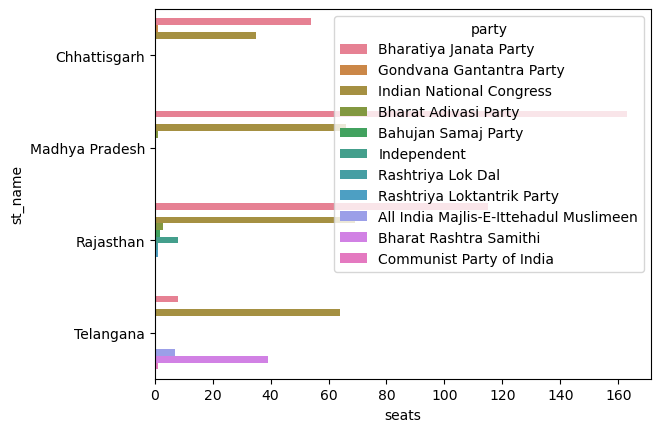

In [184]:
sns.barplot(df1, y='st_name', x='seats', hue='party')

<Axes: ylabel='party'>

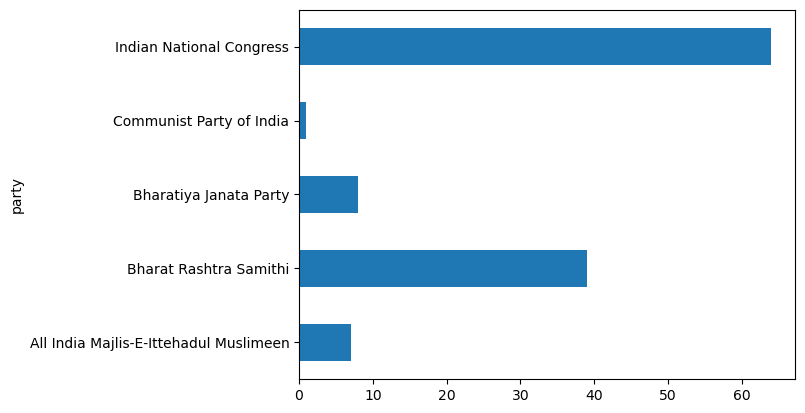

In [190]:
df1[df1.st_name == 'Telangana'].set_index('party').seats.plot(kind='barh')

<Axes: ylabel='seats'>

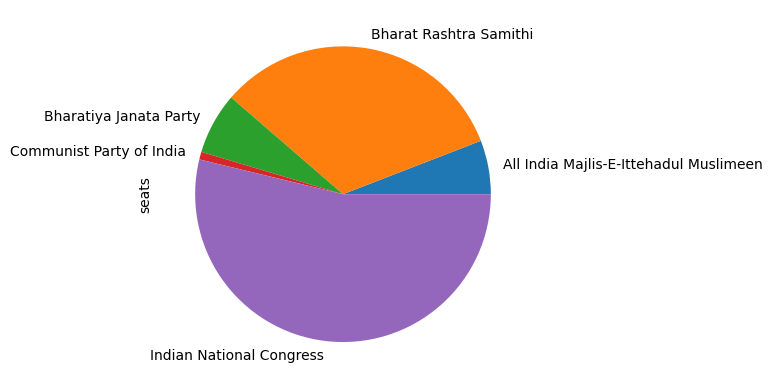

In [196]:
df1[df1.st_name == 'Telangana'].set_index('party').seats.plot(kind='pie')

## Working with Large Datasets

Tips and tricks to work with large datasets.

In [198]:
%%time
df = pd.read_parquet("data/yellow_tripdata_2009-01.parquet")

CPU times: user 18.9 s, sys: 6.24 s, total: 25.2 s
Wall time: 17.3 s


In [199]:
df.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70


In [206]:
%%time
df = pd.read_parquet("data/yellow_tripdata_2009-01.parquet", columns=["Payment_Type", "Total_Amt"])
df.head()

CPU times: user 1.07 s, sys: 253 ms, total: 1.33 s
Wall time: 1.04 s


,Payment_Type,Total_Amt
0,CASH,9.40
1,Credit,14.60
2,Credit,28.44
3,CREDIT,18.45
4,CASH,3.70


In [204]:
df1 = pd.read_csv("data/gapminder.csv", nrows=10)

In [205]:
df1

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [207]:
%%time
(pl.read_parquet("data/yellow_tripdata_2009-01.parquet", columns=['Payment_Type', 'Total_Amt'])
 .group_by('Payment_Type')
 .sum())

CPU times: user 1.21 s, sys: 244 ms, total: 1.46 s
Wall time: 882 ms


Payment_Type,Total_Amt
str,f64
"""CREDIT""",2.3527e6
"""Cash""",4.5501e7
"""Dispute""",95812.83
"""No Charge""",417753.42
"""CASH""",5.6187e7
"""Credit""",4.0082e7


In [ ]:
%%time
(pd.read_parquet("data/yellow_tripdata_2009-01.parquet", columns=['Payment_Type', 'Total_Amt'])
 .groupby('Payment_Type')
 .sum())